### Barrier Option Valuation Johnson SU

In [26]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spop
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


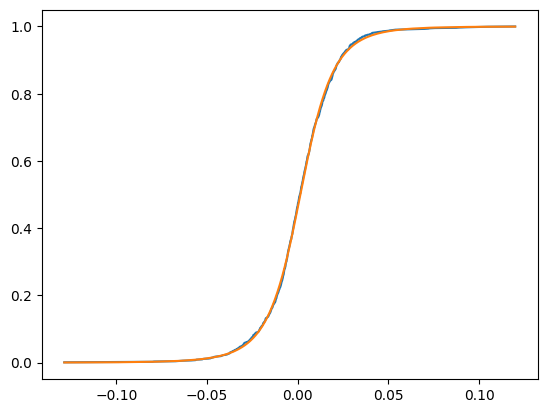

The p-value of the Kolmogorov-Smirnov Test equals 79.2949%
The distribution fits the data


In [27]:
# Johnson SU Distribution
# probability density function: f(x) = scale2/(scale1*sqrt(2*pi))/sqrt(1+((x-loc1)/scale1)^2)*e^(-1/2*(loc2 + scale2*arcsinh((x-loc1)/scale1))^2)
# cumulative distribution function: F(x) = N(loc2 + scale2*arcsinh((x-loc1)/scale1))
# specify the example
ticker = 'AAPL'
start = '2019-07-12'
end = '2024-07-12'
# retrieve data
prices = yf.download(ticker, start, end)['Close']
# calculate and sort returns
returns = np.array(prices[1:])/np.array(prices[:-1]) - 1
returns = np.sort(returns)
# construct empirical distribution function
edf = np.arange(1, len(returns)+1)/len(returns)
# calculate mean and standard deviation
mean = np.average(returns)
std = np.std(returns)
# optimize Johnson SU distribution parameters using maximum likelihood estimation
def johnson_su_optimization(k):
    k[1] = abs(k[1])
    k[3] = abs(k[3])
    pdf = k[3]/(k[1]*(2*np.pi)**(1/2))/(1 + ((returns - k[0])/k[1])**2)**(1/2)*np.exp(-1/2 * (k[2] + k[3]*np.arcsinh((returns - k[0])/k[1]))**2)
    return -np.sum(np.log(pdf))

# retrieve optimal distribution parameters
res = spop.minimize(johnson_su_optimization, [mean, std, 0, 1], method="Nelder-Mead")
su_loc_1 = res.x[0]
su_scale_1 = abs(res.x[1])
su_loc_2 = res.x[2]
su_scale_2 = abs(res.x[3])

# calculate the cumulative distribution function
cdf = sps.norm.cdf(su_loc_2 + su_scale_2*np.arcsinh((returns - su_loc_1)/su_scale_1))

# visualize the distribution function
plt.plot(returns, edf)
plt.plot(returns, cdf)
plt.show()

# evaluate the goodness-of-fit using Kolmogorov-Smirnov Test
supremum = max(abs(edf- cdf))
p_value = np.exp(-supremum**2*len(returns))
print('The p-value of the Kolmogorov-Smirnov Test equals '+ str(round(p_value*100, 4))+'%')
if p_value < 0.1:
    print("The distribution does not fit the data")
else:
    print("The distribution fits the data")

In [28]:
# retrieve the option book of the underlying
options = yf.Ticker(ticker).option_chain('2024-07-12')
calls = options.calls
puts = options.puts

In [29]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240712C00100000,2024-07-05 13:30:05+00:00,100.0,122.02,125.75,127.75,0.000000,0.000000,7.0,9,4.859379,True,REGULAR,USD
1,AAPL240712C00105000,2024-06-25 14:54:30+00:00,105.0,104.97,120.75,122.85,0.000000,0.000000,NaN,1,4.726567,True,REGULAR,USD
2,AAPL240712C00120000,2024-07-09 14:05:15+00:00,120.0,111.50,106.15,107.75,3.099998,2.859777,1.0,11,4.248052,True,REGULAR,USD
3,AAPL240712C00125000,2024-07-05 13:30:04+00:00,125.0,97.07,101.30,102.85,0.000000,0.000000,2.0,2,4.177739,True,REGULAR,USD
4,AAPL240712C00130000,2024-07-08 17:14:06+00:00,130.0,96.72,95.75,97.85,0.000000,0.000000,2.0,9,3.519532,True,REGULAR,USD
5,AAPL240712C00135000,2024-07-09 16:59:42+00:00,135.0,93.05,91.05,92.90,0.000000,0.000000,2.0,3,3.574220,True,REGULAR,USD
6,AAPL240712C00140000,2024-06-11 13:37:22+00:00,140.0,57.45,0.00,0.00,0.000000,0.000000,NaN,1,0.000010,True,REGULAR,USD
7,AAPL240712C00145000,2024-06-28 19:00:49+00:00,145.0,68.50,80.70,83.40,0.000000,0.000000,20.0,21,3.222658,True,REGULAR,USD
8,AAPL240712C00150000,2024-07-10 19:17:27+00:00,150.0,81.98,76.85,78.25,0.000000,0.000000,11.0,9,3.423830,True,REGULAR,USD
9,AAPL240712C00155000,2024-07-09 17:04:52+00:00,155.0,73.73,71.40,73.35,0.000000,0.000000,1.0,21,3.072268,True,REGULAR,USD


In [30]:
prices[-1]

/tmp/ipykernel_91153/4053240587.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prices[-1]


226.51499938964844

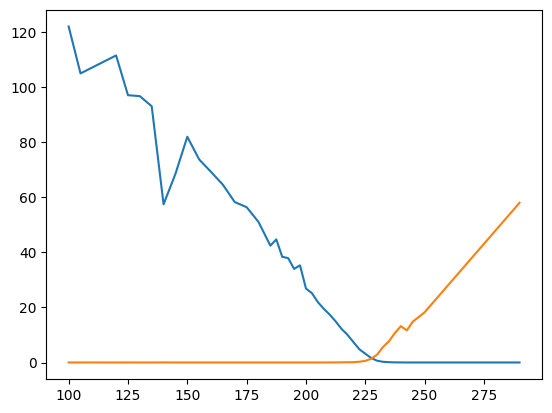

In [31]:
#visualize market option prices
plt.plot(calls['strike'], calls['lastPrice'])
plt.plot(puts['strike'], puts['lastPrice'])
plt.show()

In [32]:
# specify the dimension of the seed for valuation
maturity = 30
n_sim = 1000
seed = np.random.random((maturity, n_sim))

In [33]:
seed

array([[0.23967219, 0.83094539, 0.27879385, ..., 0.64678907, 0.03838206,
        0.88335896],
       [0.76265713, 0.24223722, 0.76493139, ..., 0.90631297, 0.19149158,
        0.05558461],
       [0.90553914, 0.91474311, 0.11663806, ..., 0.14422507, 0.54007791,
        0.4916693 ],
       ...,
       [0.4465312 , 0.41913021, 0.2418301 , ..., 0.38203507, 0.07631316,
        0.61368259],
       [0.83102232, 0.30418745, 0.36503095, ..., 0.38689299, 0.29658179,
        0.42945818],
       [0.63540481, 0.85022159, 0.08430475, ..., 0.66756522, 0.79857696,
        0.12581081]])

In [34]:
# generate returns using the seed and the Johnson SU quantile function
# returns = loc1 + scale1*sinh((f(random) - loc2)/scale2)
sim_returns = su_loc_1 + su_scale_1 * np.sinh((sps.norm.ppf(seed) - su_loc_2)/su_scale_2)

In [35]:
sim_returns

array([[-0.00946398,  0.01669917, -0.00746216, ...,  0.00704458,
        -0.03318918,  0.02129258],
       [ 0.01242312, -0.00932494,  0.01254696, ...,  0.02401881,
        -0.01234934, -0.02815956],
       [ 0.02391597,  0.02520129, -0.01859651, ..., -0.01592562,
         0.00292915,  0.00114496],
       ...,
       [-0.0005261 , -0.00155897, -0.00934693, ..., -0.0029974 ,
        -0.02400399,  0.00571995],
       [ 0.01670482, -0.00627522, -0.00367803, ..., -0.00280569,
        -0.00662299, -0.0011673 ],
       [ 0.00658229,  0.01819968, -0.02272139, ...,  0.00791017,
         0.0145101 , -0.017643  ]])

In [36]:
# simulate prices and calculate relevant values for payoff calculation
sim_prices = prices[-1] * pd.DataFrame(1 + sim_returns).cumprod()
max_prices = sim_prices.max()
min_prices = sim_prices.min()
price_at_expiry = sim_prices.iloc[-1]

/tmp/ipykernel_91153/2361767335.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim_prices = prices[-1] * pd.DataFrame(1 + sim_returns).cumprod()


In [37]:
sim_prices

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,224.371266,230.297612,224.824708,225.895658,229.527243,227.456812,225.251839,225.677991,229.794947,224.718901,...,225.938638,221.932191,225.346179,227.048357,242.154467,227.711653,228.206608,228.110703,218.997153,231.338088
1,227.158657,228.150101,227.645574,228.272702,234.026743,223.242859,207.786047,225.935200,226.773488,225.949840,...,226.471679,221.191216,219.475563,224.120174,238.894293,228.109680,227.720953,233.589651,216.292683,224.823710
2,232.591376,233.899778,223.412161,229.861713,227.156023,224.474248,207.396851,229.648210,224.052612,224.264846,...,226.164369,223.651339,220.873534,218.245562,232.288812,226.453263,214.868096,229.869590,216.926236,225.081125
3,238.604442,232.641352,223.769105,239.321145,226.235972,228.371169,213.348014,227.402720,230.421301,226.010463,...,228.949484,214.727984,217.957234,221.659942,228.986805,231.625836,217.170876,222.264381,219.261228,224.597523
4,239.721173,232.646259,220.802748,241.521442,231.081416,226.912837,216.664663,230.336563,231.912810,229.283353,...,235.471895,213.602959,220.654132,222.923638,231.311103,230.894983,215.719909,221.594167,221.449700,226.209082
5,240.618460,237.589525,218.976936,229.397122,230.429060,227.716894,205.160846,225.923813,226.251125,228.523893,...,232.216303,213.658575,221.007455,225.790396,224.203126,231.288830,217.164208,224.019341,215.885763,222.533635
6,243.376781,239.684949,222.234969,232.727378,225.353015,226.890877,206.724535,229.182096,225.318155,228.830135,...,243.348299,207.852756,223.246315,222.367627,228.484037,233.734390,215.148180,225.765517,215.396891,221.122717
7,245.004013,238.506330,221.137487,228.413884,244.837316,218.014466,198.517606,222.277384,214.012952,219.242183,...,243.553978,210.452086,225.153681,219.663397,225.726883,238.704634,213.868093,223.122707,216.859226,222.042610
8,246.573859,237.640910,224.785963,232.233251,241.876477,218.450169,197.968525,229.216922,209.004459,217.801961,...,242.191941,207.180148,225.733957,224.809683,229.802690,244.139632,206.484897,219.331248,225.202921,216.841377
9,249.673734,234.116809,224.838916,234.337068,239.040722,219.503883,203.370192,232.883459,206.144245,216.150238,...,243.062062,203.816959,224.811370,219.342736,230.877652,244.703237,210.327843,215.322418,227.184231,216.254593


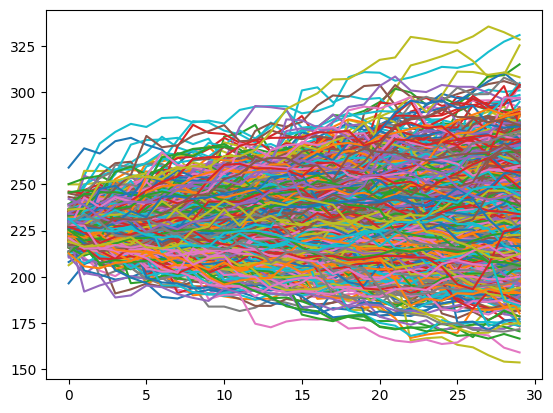

In [38]:
# visualize price random walks
plt.plot(sim_prices)
plt.show()

In [46]:
# specify the option characteristics
strike = 140
barrier_up = 160
barrier_down = 120
risk_free = 0.047

In [47]:
# calculate option payoffs and values
up_in_payoff = (max_prices >= barrier_up) * np.maximum(0, price_at_expiry - strike)
up_out_payoff = (max_prices < barrier_up) * np.maximum(0, price_at_expiry - strike)
down_in_payoff = (min_prices <= barrier_down) * np.maximum(0, strike - price_at_expiry)
down_out_payoff = (min_prices > barrier_down) * np.maximum(0, strike - price_at_expiry)
up_in_value = np.average(up_in_payoff)/(1 + risk_free)**(maturity/252)
up_out_value = np.average(up_out_payoff)/(1 + risk_free)**(maturity/252)
down_in_value = np.average(down_in_payoff)/(1 + risk_free)**(maturity/252)
down_out_value = np.average(down_out_payoff)/(1 + risk_free)**(maturity/252)
print('the fair value of the up-and-in call at strike ' + str(strike) + ' and barrier ' + str(barrier_up) + ' equals ' + str(round(up_in_value, 2)) + '.')
print('the fair value of the up-and-out call at strike ' + str(strike) + ' and barrier ' + str(barrier_up) + ' equals ' + str(round(up_out_value, 2)) + '.')
print('the fair value of the down-and-in put at strike ' + str(strike) + ' and barrier ' + str(barrier_down) + ' equals ' + str(round(down_in_value, 2)) + '.')
print('the fair value of the down-and-out put at strike ' + str(strike) + ' and barrier ' + str(barrier_down) + ' equals ' + str(round(down_out_value, 2)) + '.')
call_value = up_in_value + up_out_value
put_value = down_in_value + down_out_value
call_price = float(calls[calls['strike'] == strike]['lastPrice'])
put_price = float(puts[puts['strike'] == strike]['lastPrice'])
print("the fair value of the call at strike " + str(strike) + " equals " + str(round(call_value, 2)) + ".")
if call_value > call_price:
    print("the call option available at the market is undervalued at " + str(call_price) + ".")
else:
    print("the call option available at the market is overvalued at " + str(call_price) + ".")
print("the fair value of the put at strike " + str(strike) + " equals " + str(round(put_value, 2)) + ".")

if put_value > put_price:
    print("the put option available at the market is undervalued at " + str(put_price) + ".")
else:
    print("the put option available at the market is overvalued at " + str(put_price) + ".")

the fair value of the up-and-in call at strike 140 and barrier 160 equals 95.03.
the fair value of the up-and-out call at strike 140 and barrier 160 equals 0.0.
the fair value of the down-and-in put at strike 140 and barrier 120 equals 0.0.
the fair value of the down-and-out put at strike 140 and barrier 120 equals 0.0.
the fair value of the call at strike 140 equals 95.03.
the call option available at the market is undervalued at 57.45.
the fair value of the put at strike 140 equals 0.0.
the put option available at the market is overvalued at 0.02.


/tmp/ipykernel_91153/2486533451.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  call_price = float(calls[calls['strike'] == strike]['lastPrice'])
/tmp/ipykernel_91153/2486533451.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  put_price = float(puts[puts['strike'] == strike]['lastPrice'])


In [43]:
put_price

0.01

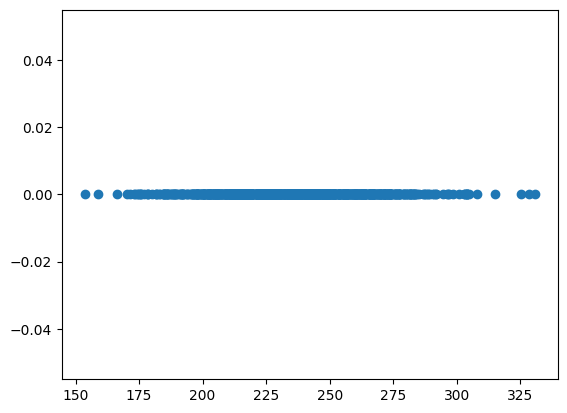

In [41]:
plt.scatter(price_at_expiry, down_out_payoff)
plt.show()